In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy import integrate
import AnaUtils as au
import Triggered as tr
import glob
import os

In [7]:
pmt = "KA0219"
wdir = '/data/share/ReplacementPMTs'
fWaves = [os.path.splitext(iF)[0] for iF in glob.glob('{}/{}/Lin/*.bin'.format(wdir,pmt))]
Gains = np.array([iF.split('/')[-1].split('_')[1] for iF in fWaves])
fWaves,Gains

(['/data/share/ReplacementPMTs/KA0219/Lin/1768V_1PE_200824_100_samples_30000_events',
  '/data/share/ReplacementPMTs/KA0219/Lin/1768V_3PE_200824_100_samples_30000_events'],
 array(['1PE', '3PE'], dtype='<U3'))

In [8]:
QHists = [tr.extRun(iG,30,5,5,qbins=200,qW=0.1,plot=False) for iG in fWaves]
#QHists = [tr.extRun(fWaves[0],30,5,5,qbins=200,plot=True)]

'/data/share/ReplacementPMTs/figs/KA0219_Lin.png'

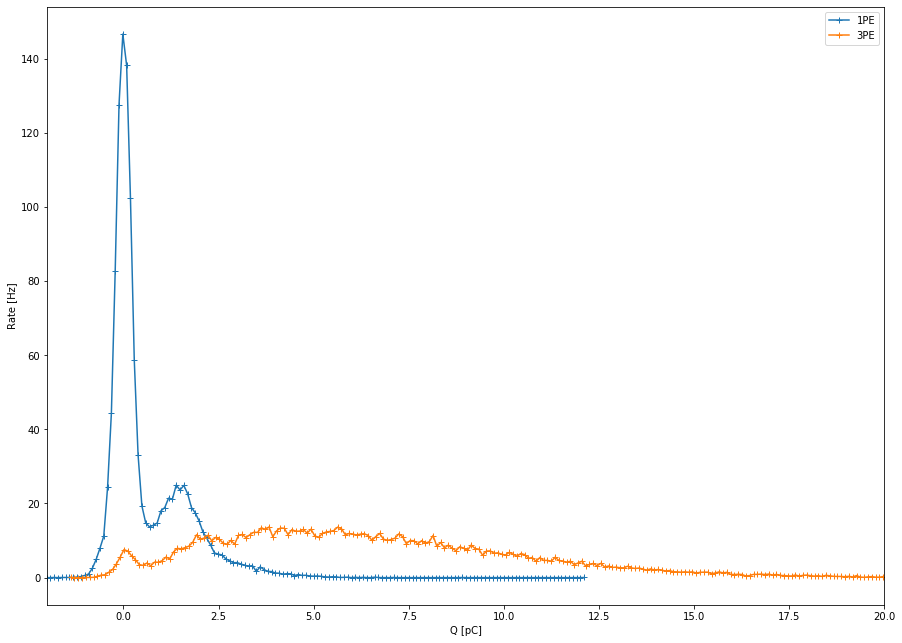

In [9]:
for iQ in range(len(QHists)):
    plt.plot(QHists[iQ][1],QHists[iQ][0],marker='+',label=Gains[iQ])
    #break
    #GFit = tr.fitQ(QSPE,[0,12,1,3,1,1])
    #plt.show()
    #print(GFit)
#plt.yscale('log')
plt.xlim(-2,20)
plt.xlabel('Q [pC]')
plt.ylabel('Rate [Hz]')
plt.legend()
"{}/figs/{}_Lin.png".format(wdir,pmt)